In [15]:
#skewness is asymmetric in the graph,when skewness is zero give the perfect graph
#kurtosis is mesure of peak when it is zero then less high 

In [16]:
import pandas as pd
data=pd.read_csv('C:/Users/dheve/OneDrive/Desktop/course/NewspaperData.csv')
data

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


C:\Users\dheve\AppData\Local\Temp\ipykernel_17996\2929324081.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['daily'])


<Axes: xlabel='daily', ylabel='Density'>

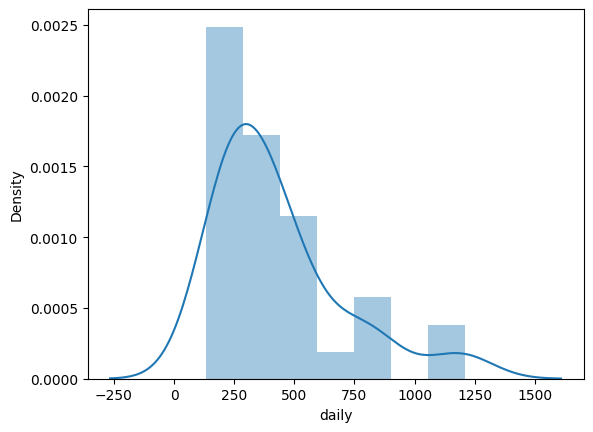

In [17]:
import seaborn as sns
sns.distplot(data['daily'])

In [18]:
from scipy.stats import kurtosis
import numpy as np
import statistics as st
print('skew of the raw data %f',data['sunday'].skew())
print(st.median(data['sunday']))
data.describe()
#symmetric is (-0.5,0) or (0,0.5)
#right_skewness is 1
#left_skewness is -1

skew of the raw data %f 1.5644730738925112
436.7125


,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


In [19]:
data['sunday'].kurtosis()#is platikuratic,leptokutic is >3 and mesokurtic is =0 and platikurtic is <3

2.2094379272649083

<Axes: xlabel='daily', ylabel='Count'>

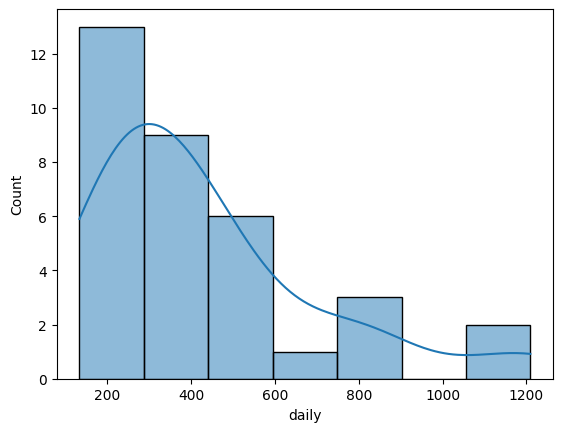

In [20]:
import seaborn as sns
sns.histplot(data['daily'],kde=True)

430.9624705882353

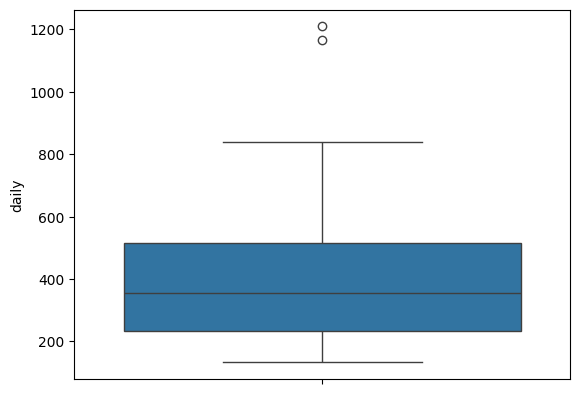

In [22]:
sns.boxplot(data['daily'])
import statistics as st
st.mean(data['daily'])

In [23]:
df = pd.DataFrame(data)
def find_outliers(df):
    outliers = {}
    for column in df.columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')
        clean_data = df[column].dropna()
        if not clean_data.empty:
            Q1 = clean_data.quantile(0.25)
            Q3 = clean_data.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outlier_values = clean_data[(clean_data < lower_bound) | (clean_data > upper_bound)]
            outliers[column] = outlier_values.tolist()
    return outliers
outliers = find_outliers(df)
print(outliers)

{'daily': [1164.388, 1209.225], 'sunday': [1531.527, 1762.015]}
